In [1]:
# This uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing 
# stock price of a corporation (Apple Inc.)

In [2]:
# Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [3]:
tickerSymbol = input("Enter Ticker Symbol: \n")
endDate = input("Enter End Date(YYYY-MM-DD): ")


Enter Ticker Symbol: 
FB
Enter End Date(YYYY-MM-DD): 2020-05-11


In [4]:
df = web.DataReader(tickerSymbol, data_source='yahoo', start = '2012-01-01', end=endDate)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999
2012-05-25,32.950001,31.110001,32.900002,31.910000,37149800,31.910000
2012-05-29,31.690001,28.650000,31.480000,28.840000,78063400,28.840000
2012-05-30,29.549999,27.860001,28.700001,28.190001,57267900,28.190001
2012-05-31,29.670000,26.830000,28.549999,29.600000,111639200,29.600000


In [5]:
df.shape


(2007, 6)

C:\Users\aboli\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


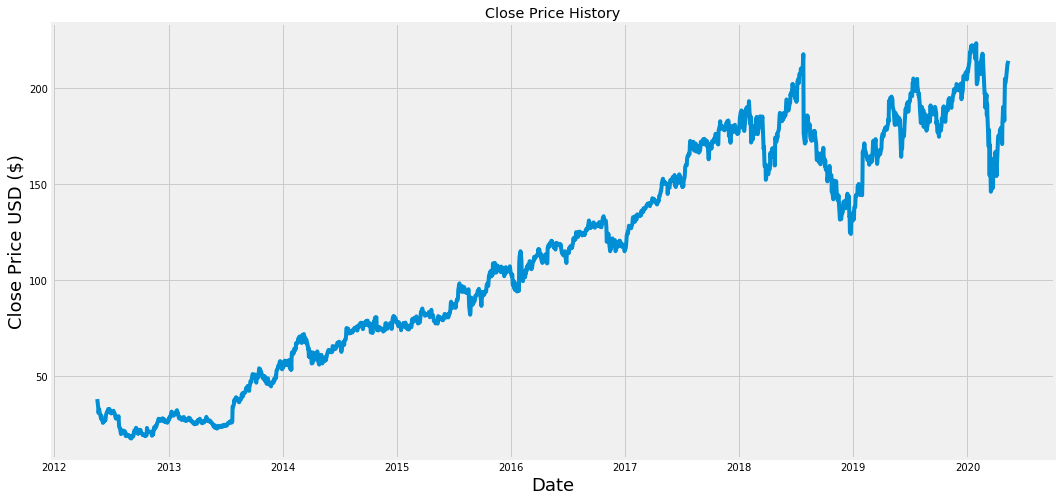

In [6]:
plt.figure(figsize = (16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

In [7]:
#DF with Just Close Column
data = df.filter(['Close'])
dataset = data.values #NP array

#Rows to train model on
training_data_length = math.ceil(len(dataset) * .8)


In [8]:
#Scale Data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.09975669],
       [0.07931873],
       [0.06457421],
       ...,
       [0.94175182],
       [0.94705601],
       [0.95527979]])

In [9]:
# Create Training Data Set
# Created Scaled training data set
train_data = scaled_data[0:training_data_length , :]
#Split into x_train and y_train sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
    

In [10]:
#Convert x_train y_train to np arr
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1546, 60, 1)

In [12]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)


Epoch 1/1
1546/1546 [==============================] - 165s 106ms/step - loss: 0.0014


In [15]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_length - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_length:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [16]:
#Convert data to np array
x_test = np.array(x_test)

In [17]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [18]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [19]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

8.533151783356747

C:\Users\aboli\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


<function matplotlib.pyplot.show(*args, **kw)>

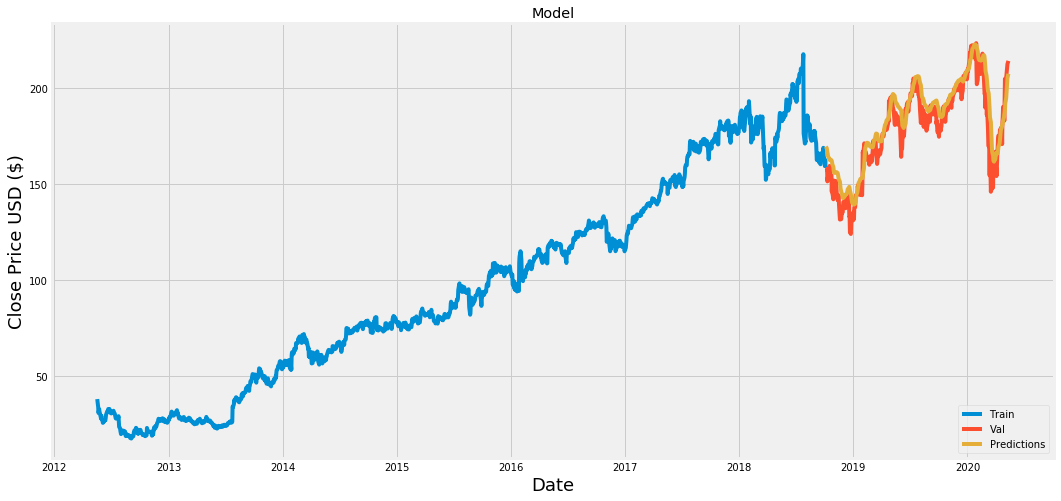

In [20]:
#Plot the data
train = data[:training_data_length]
valid = data[training_data_length:]
valid['Predictions'] = predictions
#Visualize the Data
plt.figure(figsize = (16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show

In [21]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-10-05,157.330002,169.495941
2018-10-08,157.250000,168.595078
2018-10-09,157.899994,167.689789
2018-10-10,151.380005,166.930450
2018-10-11,153.350006,165.654907
2018-10-12,153.740005,164.501083
2018-10-15,153.520004,163.529083
2018-10-16,158.779999,162.713333
2018-10-17,159.419998,162.581406


In [22]:
#Get the quote
apple_quote = web.DataReader(tickerSymbol, data_source = 'yahoo', start = '2012-01-01', end = '2020-05-04')
#Create a new Dataframe
new_df = apple_quote.filter(['Close'])
#Get the kast 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be vals between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Empty List
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to np array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[197.52956]]


In [23]:
apple_quote2 = web.DataReader(tickerSymbol, data_source = 'yahoo', start = '2020-05-04', end = '2020-05-05')
print(apple_quote2)

                  High         Low        Open       Close    Volume  \
Date                                                                   
2020-05-04  205.910004  198.759995  200.199997  205.259995  19250700   
2020-05-05  210.380005  206.500000  207.020004  207.070007  21071200   

             Adj Close  
Date                    
2020-05-04  205.259995  
2020-05-05  207.070007  
